This project is widely inspired by Pedro Marcelino's "Comprehensive Data Exploration with Python" notebook. The main goal is to get familiar with common practices and methods performed in data science projects as well as the different python libraries used and their multiple applications.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
df_train = pd.read_csv('data/train.csv')

After reading the data, we want to understand the meaning of each variable and if possible, categorize them. It is also primordial to try to scope the potiential influence each variable can have on the independant variable SalesPrice. 
We can categorize the variable that have a potential influence on SalesPrice in three categories, low, medium, and high. This task is conducted in an excel spreadsheet.

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Before proceeding further to data analysis, we must know what variable to focus our efforts on, or in other terms, what vriables may have the largest impact on the independant variable. In order to determine what are those variables, we must go through the list of all variables and ask ourselves questions like "if I had to buy a house, how what importance would I give to 'this' variable ?", "Is the eventual value we can harvest from this variable already covered by another one ?" etc.

After this exercise, five variables are retained: GrLivArea, OverallQual, YearBuilt, Neighbourhood, and TotalBsmtSF.

In [10]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

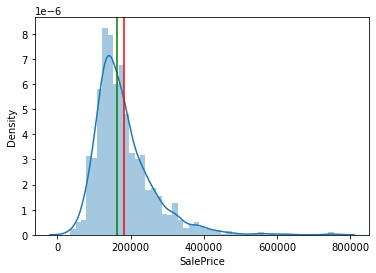

In [22]:
sns.distplot(df_train['SalePrice']);
plt.axvline(df_train['SalePrice'].mean(), color="red")
plt.axvline(df_train['SalePrice'].median(), color="green");

We see that the distribution differ greatly compared to a normal distribution with an important positive skew. The mean and median are both greater than the mode. Distribution is leptokurtic with an important peak. 

In [23]:
print("Kurt: %f" % df_train['SalePrice'].kurt());
print("Skew: %f" % df_train['SalePrice'].skew());

Kurt: 6.536282
Skew: 1.882876


Now that we have a better idea of how SalePrice distribution looks like, we will search for a correlation between SalePrice and the four variables previously selected. Let's start with GrLiveArea.

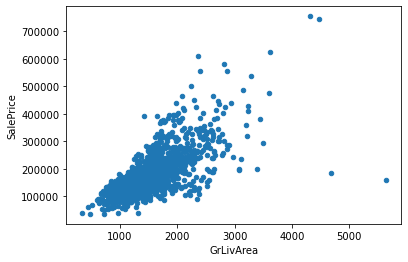

In [36]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1);
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0.9));

There is an obvious linear relation between SalePrice and GrLivArea. Let's take a look at TotalBsmtSF.

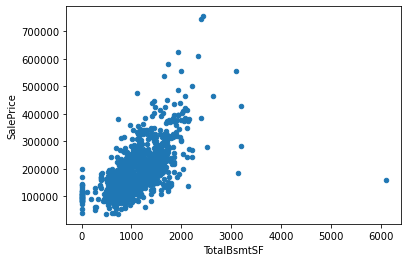

In [37]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1);
data.plot.scatter(x=var, y='SalePrice', ylim=(0.9));

First, we notice that eventhough there is a clear relation between TotalBsmtSF and SalePrice, it is not so obvisous that it is a linear realation. Indeed, SalePrice value's increase rate seems to not be consistent with that of TotalBsmtSF which sends us clues that it may be an exponential relationship. 
Also, there are many points with a TotalBsmtSF value of 0.

Now, the three other selected variables, namely OverallQual, YearBuilt, and Neighbourhood, are categorical variables. We proceed using boxplot to analyze the influence these variables have on SalePrice. We start with YearBuilt.

In [38]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1);


AttributeError: 'PlotAccessor' object has no attribute 'boxplot'